In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '/mnt/d/Documents/summary_avg_bd.csv'
df = pd.read_csv(path, index_col=0)
df['mean_age'] = df['mean_age']/8760
df['Year'] = df['Time_Step'] // 8760
df.head()

,Study_Site,Experiment,Cause_Of_Death,Time_Step,Species,mean_mass,num_agents,mean_age,mean_body_temp,Year
0,Canada,1,starved,16980,Rattlesnake,203.033578,1,3.816895,28.371802,1
1,Canada,1,starved,17274,Rattlesnake,221.446826,1,9.009817,31.547322,1
2,Canada,1,starved,17376,Rattlesnake,323.564295,1,18.653196,15.080189,1
3,Canada,1,starved,17467,Rattlesnake,313.941881,1,1.876941,32.839411,1
4,Canada,1,starved,17772,Rattlesnake,314.198789,1,1.359932,30.902753,2


In [13]:
len(df)

156576

In [6]:
year_df = df.groupby(['Year', 'Cause_Of_Death', 'Experiment', 'Study_Site'])['num_agents'].sum().reset_index()

# Display result
print(year_df.head())

   Year Cause_Of_Death  Experiment Study_Site  num_agents
0     0         Random           0     Canada         177
1     0         Random           0   Nebraska         148
2     0         Random           0      Texas         142
3     0         Random           1     Canada         173
4     0         Random           1   Nebraska         153


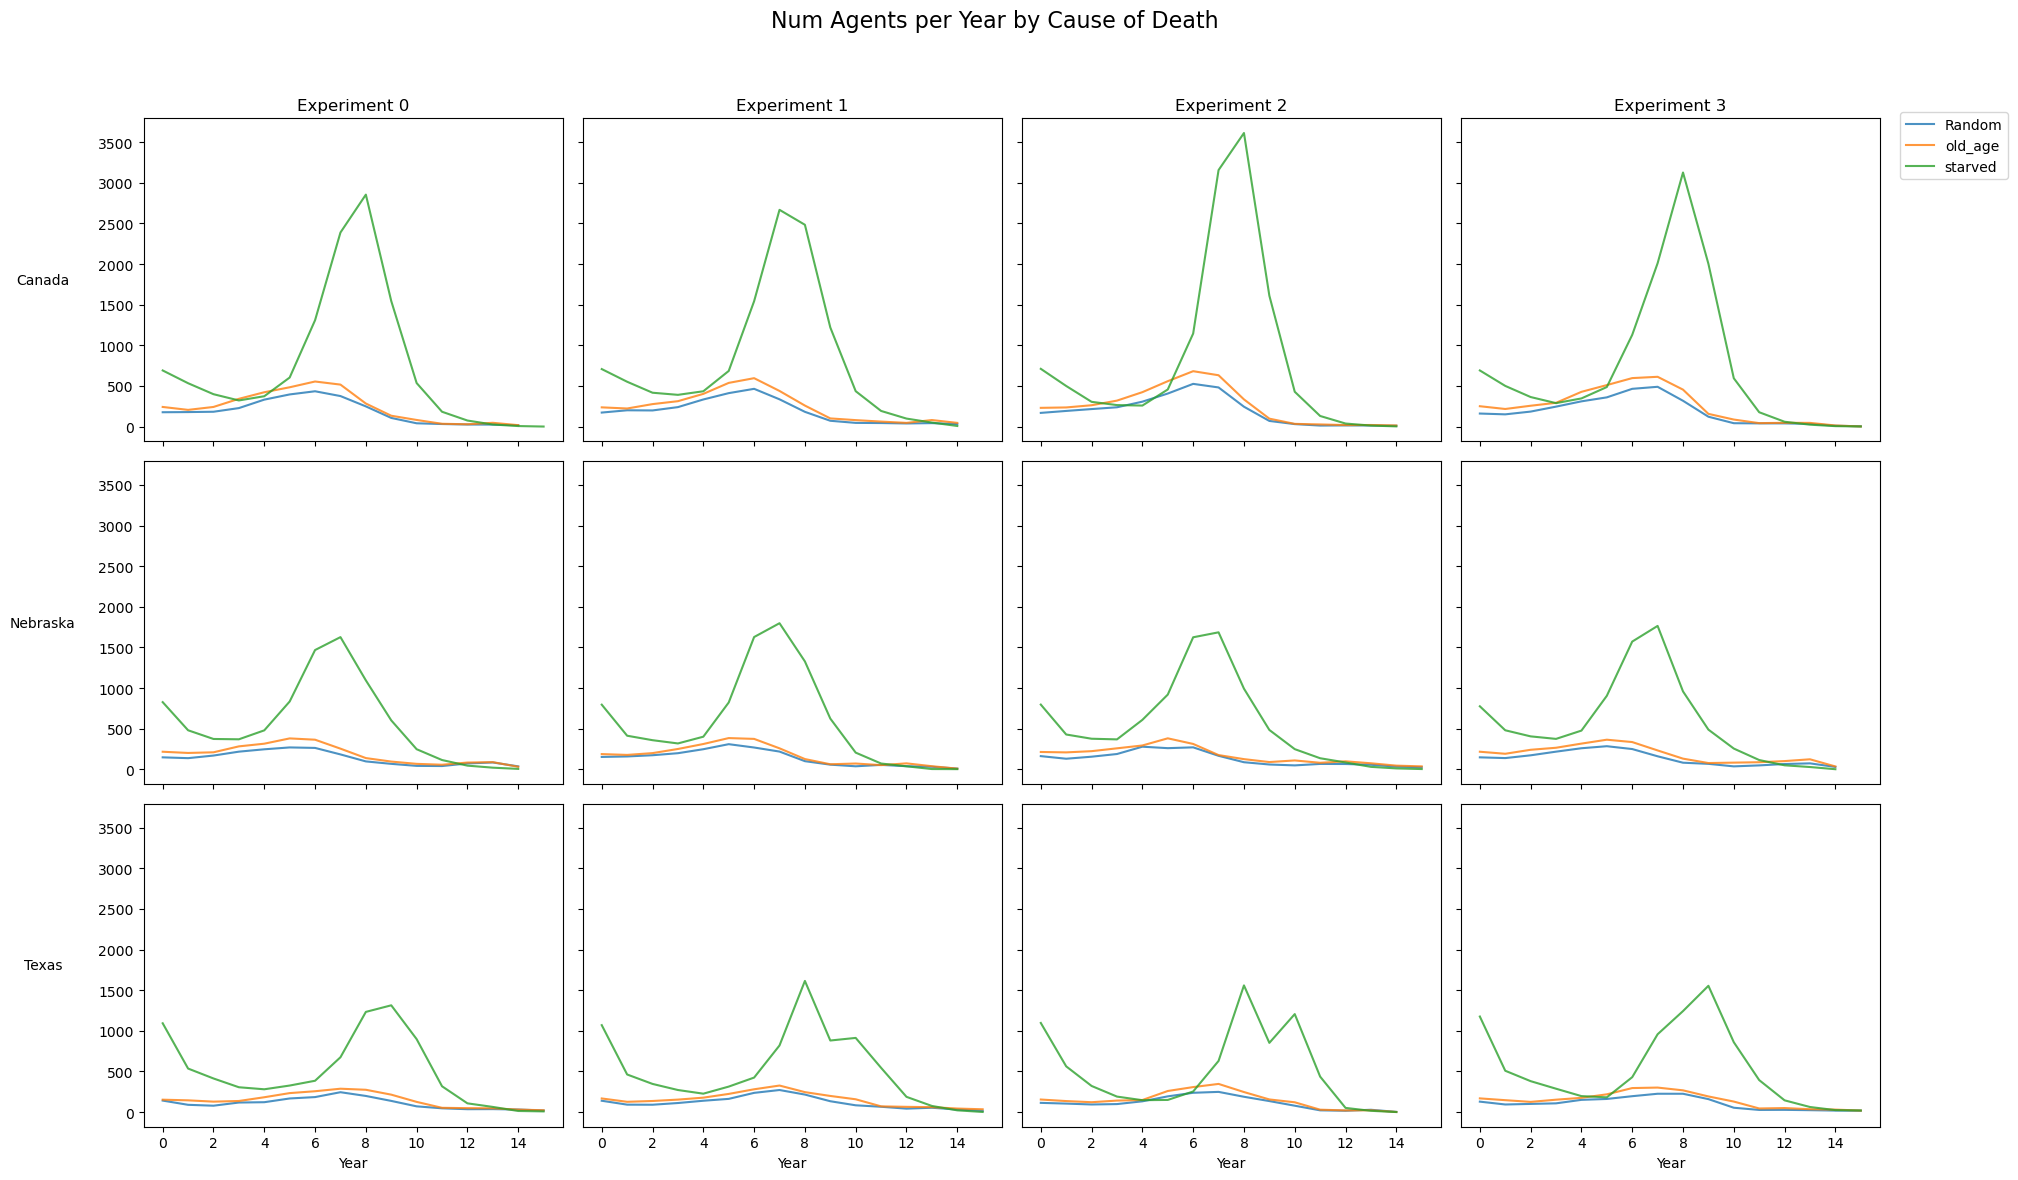

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Get unique values
sites = sorted(year_df['Study_Site'].unique())
experiments = sorted(year_df['Experiment'].unique())

# Create subplot grid
fig, axes = plt.subplots(nrows=len(sites), ncols=len(experiments), figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle('Num Agents per Year by Cause of Death', fontsize=16)

# Plot each site (row) and experiment (column)
for i, site in enumerate(sites):
    for j, exp in enumerate(experiments):
        ax = axes[i, j]
        subset = year_df[(year_df['Study_Site'] == site) & (year_df['Experiment'] == exp)]
        
        # Plot one line per cause of death
        for cod, group in subset.groupby('Cause_Of_Death'):
            ax.plot(group['Year'], group['num_agents'], label=cod, alpha=0.8)
        
        # Title and labels
        if i == 0:
            ax.set_title(f'Experiment {exp}')
        if j == 0:
            ax.set_ylabel(f'{site}', rotation=0, labelpad=40, va='center')
        if i == len(sites) - 1:
            ax.set_xlabel('Year')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.01, 0.9))

plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


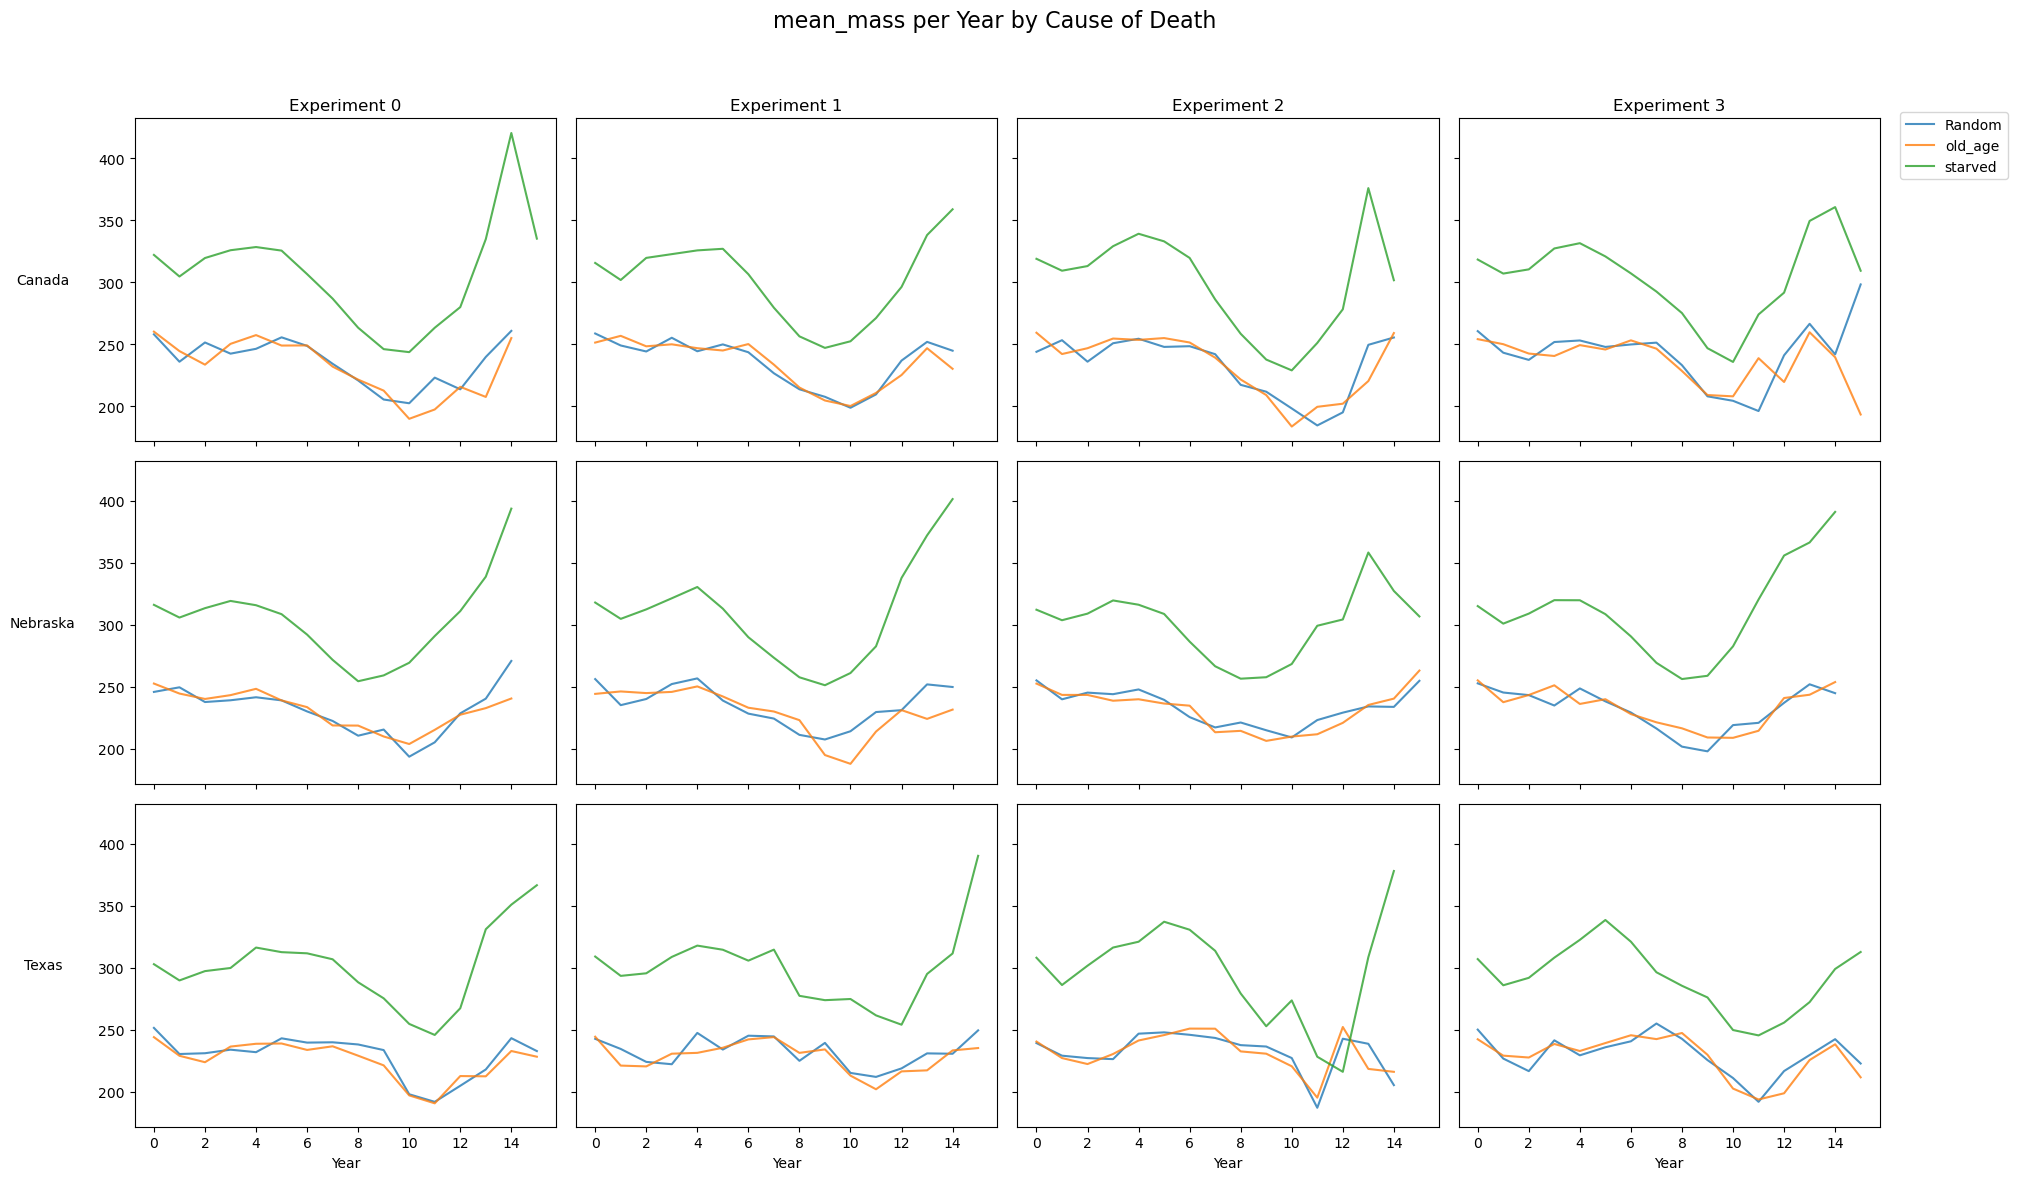

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

year_df = df.groupby(['Year', 'Cause_Of_Death', 'Experiment', 'Study_Site'])['mean_mass'].mean().reset_index()
# Get unique values
sites = sorted(year_df['Study_Site'].unique())
experiments = sorted(year_df['Experiment'].unique())

# Create subplot grid
fig, axes = plt.subplots(nrows=len(sites), ncols=len(experiments), figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle('mean_mass per Year by Cause of Death', fontsize=16)

# Plot each site (row) and experiment (column)
for i, site in enumerate(sites):
    for j, exp in enumerate(experiments):
        ax = axes[i, j]
        subset = year_df[(year_df['Study_Site'] == site) & (year_df['Experiment'] == exp)]
        
        # Plot one line per cause of death
        for cod, group in subset.groupby('Cause_Of_Death'):
            ax.plot(group['Year'], group['mean_mass'], label=cod, alpha=0.8)
        
        # Title and labels
        if i == 0:
            ax.set_title(f'Experiment {exp}')
        if j == 0:
            ax.set_ylabel(f'{site}', rotation=0, labelpad=40, va='center')
        if i == len(sites) - 1:
            ax.set_xlabel('Year')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.01, 0.9))

plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()
